In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("driver-data .csv")
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [3]:
features = ['mean_dist_day', 'mean_over_speed_perc']
X = df[features]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [6]:
kmeans = KMeans(n_clusters=4, n_init=10,random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [7]:
df['cluster'] = clusters

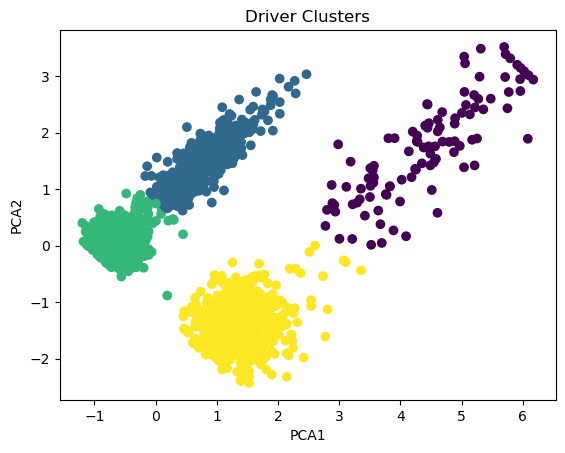

In [8]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Driver Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


In [9]:
print(df.groupby('cluster')[features].mean())


         mean_dist_day  mean_over_speed_perc
cluster                                     
0           177.835096             70.288462
1            50.404824             32.365340
2            50.016637              5.204037
3           180.434863             10.529496
